In [5]:
#QUESTION 1

import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the dataset
data = pd.read_csv("data_5.csv")

# Dividing the data into train and test data sets
train_dataset_1, test_dataset_1 = train_test_split(data, test_size=0.25, random_state=40)

# Printing the number of samples in train and test data grouped by "roof_type"
print("Q-1 Results:")
print("Train data:")
print(train_dataset_1["roof_type"].value_counts())
print("\nTest data:")
print(test_dataset_1["roof_type"].value_counts())

Q-1 Results:
Train data:
roof_type
Flat       1567
Gable       392
Hip         286
Pyramid       5
Name: count, dtype: int64

Test data:
roof_type
Flat       506
Gable      138
Hip         95
Pyramid      7
Shed         4
Name: count, dtype: int64


Training data (first iteration):
      structure_max_elevation  footprint_max_elevation  \
0                        30.5                     30.5   
1                        32.5                     26.5   
2                        32.5                     32.5   
3                        20.5                     19.5   
4                        24.5                     23.5   
...                       ...                      ...   
2995                     54.0                     49.5   
2996                     53.0                     45.0   
2997                     53.0                     51.0   
2998                     53.0                     44.0   
2999                     54.0                     47.5   

      structure_min_elevation  property_id  footprint_extrusion  \
0                        17.5       109953                 13.5   
1                        18.0       105685                  9.0   
2                        18.0       105685                  5.5   
3 

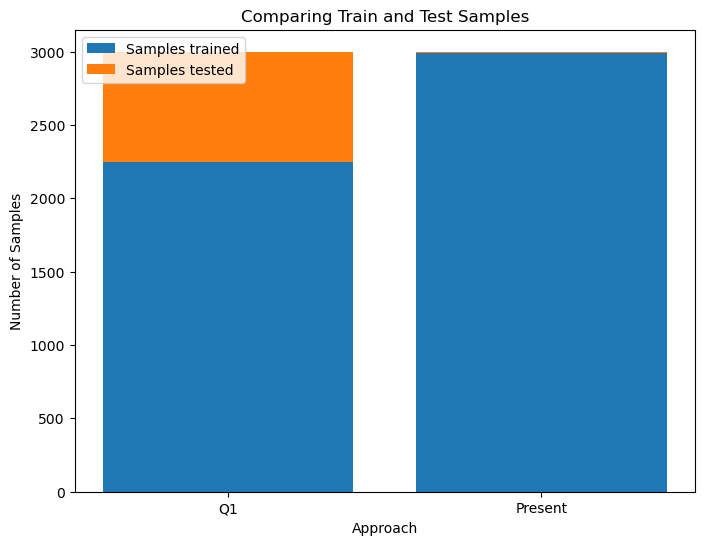

In [9]:
#QUESTION 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeavePGroupsOut


# Extracting all unique ids
prop_ids = data["property_id"].unique()

# mixing all the property id
np.random.shuffle(prop_ids)

# LeavePGroupsOut object, p=5
lpgout = LeavePGroupsOut(n_groups=5)

# Performing the leave-5-out cross-validation technique
for i, (indexoftrained, indexoftest) in enumerate(lpgout.split(data, groups=data["property_id"])):
    trained_dataset = data.iloc[indexoftrained]
    tested_dataset = data.iloc[indexoftest]
    
    #Only showing the trained_dataset and tested_dataset value for first iteration
    if i == 0:
        print("Training data (first iteration):")
        print(trained_dataset)
        print("\nTesting data (first iteration):")
        print(tested_dataset)
    
    # Printing the number of samples in train and test data grouped by "roof_type"
    print("\n")
    print(f"Iteration {i+1}:")
    print("Train data:")
    print(train_data["roof_type"].value_counts())
    print("Test data:")
    print(test_data["roof_type"].value_counts())
    
    # Breaking the loop after the first iteration 
    if i == 0:
        break


train_samples_1 = len(train_dataset_1)
test_samples_1 = len(test_dataset_1)

present_train_samples = len(trained_dataset)
present_test_samples = len(tested_dataset)

# Comparing using Q1 graph

plt.figure(figsize=(8, 6))
plt.bar(["Q1", "Present"], [train_samples_1, present_train_samples], label="Samples trained")
plt.bar(["Q1", "Present"], [test_samples_1, present_test_samples], bottom=[train_samples_1, present_train_samples], label="Samples tested")
plt.xlabel("Approach")
plt.ylabel("Number of Samples")
plt.legend()
plt.title("Comparing Train and Test Samples")
plt.show()